In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Loading of data and writing to the plot arrays

In [40]:
hemnet_data = pd.read_csv("data_assignment2.csv")
x_vals = np.array([])
y_vals = np.array([])
invalid_inputs = 0
for i, row in hemnet_data.iterrows():
    if row['Selling_price'] != None and row['Living_area'] != None:
        x_vals = np.append(x_vals,row['Living_area'])
        y_vals = np.append(y_vals,row['Selling_price'])
    else:
        invalid_inputs = invalid_inputs +1

In [41]:
invalid_inputs

0

In [27]:
model.coef_

array([[19370.13854733]])

## Drawing of scatter plot

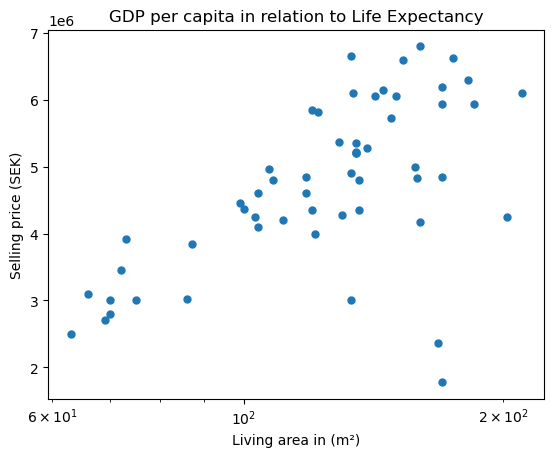

In [23]:
    plt.scatter(x_vals, y_vals, s= 25)
    plt.title("GDP per capita in relation to Life Expectancy")
    plt.xscale('log')
    plt.xlabel("Living area in (m\u00b2)")
    plt.ylabel("Selling price (SEK)")
    plt.show()

In [26]:
# Turn x_vals & y_vals into 2D arrays
x_vals= x_vals.reshape(-1, 1)
y_vals= y_vals.reshape(-1, 1)

model = LinearRegression().fit(x_vals, y_vals)

In [44]:
# Intercept value of regression-line
float(model.intercept_)

2220603.243355869

In [45]:
# Coefficent value of regression-line
float(model.coef_)

19370.13854733158

In [36]:
xfit = np.linspace(0, hemnet_data['Living_area'].max(), 10000)
yfit = model.predict(xfit[:, np.newaxis])

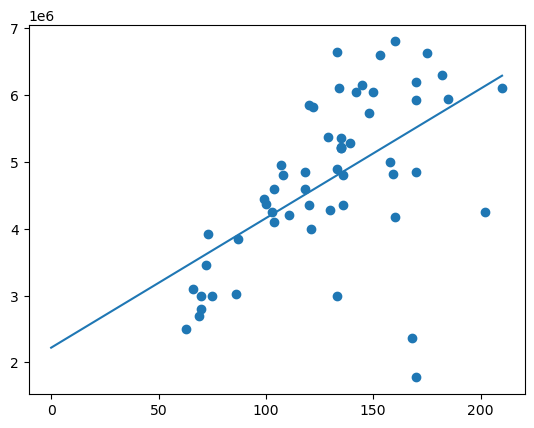

In [37]:
plt.scatter(x_vals,y_vals)
plt.plot(xfit,yfit)
plt.show()

In [33]:
# Predicted price for a house of 100 square meters
int(model.predict([[100]]))

4157617

In [31]:
# Predicted price for a house of 150 square meters
int(model.predict([[150]]))

5126124

In [32]:
# Predicted price for a house of 200 square meters
int(model.predict([[200]]))

6094630